# Анализ маркетинговых показателей Яндекс.Афиши

Объект анализа - исторические данные о посещениях сайта Яндекс.Афиши, заказов сделанных на сайте и статистика рекламных расходов за период с июня 2017 по конец мая 2018 года.
Цель исследования - проанализировать основные метрики по различным источникам трафика с целью перераспределения рекламного бюджета. Основные вопросы исследования:

 - как клиенты пользуются сервисом
 - когда делают первые покупки на сайте
 - сколько денег приносит компании каждый клиент
 - когда расходы на привлечение клиента окупаются

План работы:

    1 - Загрузка и предобработка данных 
    2 - Рассчет продуктовых метрик
    3 - Рассчет метрик электронной коммерции
    4 - Рассчет маркетинговых метрик
    5 - Выводы и рекомендации

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Загрузка и предобработка данных

In [2]:
! pip install plotly

In [3]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime


In [4]:
raw_visits = pd.read_csv("/visits_log.csv")
raw_orders = pd.read_csv("/orders_log.csv")
raw_costs = pd.read_csv("/costs.csv")

In [5]:
def table_info(table_name):
    print()
    print('Первые 5 строк:')
    display(table_name.head())
    print()
    print('Информация о содержащихся данных:')
    print()
    display(table_name.info())
    print('Обзор числовых данных:')
    display(table_name.describe())
    print('Число дубликатов:')
    display(table_name.duplicated().sum())

#### Обзор данных

In [6]:
print('Обзор таблицы visits')
table_info(raw_visits)

Обзор таблицы visits

Первые 5 строк:


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168



Информация о содержащихся данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

Обзор числовых данных:


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


Число дубликатов:


0

В таблице "visits" нет пропущенных значений и дубликатов. Тип данных в столбцах с датами сеансов следует изменить на datetime. Формат данных в столбце Source Id можно оптимизировать.

In [7]:
print('Обзор таблицы orders')
table_info(raw_orders)

Обзор таблицы orders

Первые 5 строк:


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



Информация о содержащихся данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

Обзор числовых данных:


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


Число дубликатов:


0

В таблице "orders" нет пропущенных значений и дубликатов. Тип данных в столбце с датой покупки следует изменить на datetime. Значения выручки имеют адекватные значения.

In [8]:
print('Обзор таблицы costs')
table_info(raw_costs)

Обзор таблицы costs

Первые 5 строк:


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08



Информация о содержащихся данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

Обзор числовых данных:


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


Число дубликатов:


0

В таблице "orders" нет пропущенных значений и дубликатов. Тип данных в столбце с датой проведения рекламной кампании следует изменить на datetime. Значения расходов на рекламу имеют адекватные значения. Формат данных в столбце source id можно оптимизировать.

Также необходимо привести названия столбцов к общему виду.

#### Предобработка данных

In [9]:
df_visits = raw_visits.copy()
df_orders = raw_orders.copy()
df_costs = raw_costs.copy()

In [10]:
# Функция подсчета памяти, используемой для хнанения данных

def mem_usage(data):
    usage_b = data.memory_usage(deep=True).sum()
    usage_mb = usage_b / 1024**2
    return usage_mb.round(3)

In [11]:
# Функция замены формата данных и оптимизации числовых подформатов

def dtype_optim(data):
        
    dt_columns, obj_columns = ([],[])
    data_dt = data.drop(axis = 1, columns = data.columns)
    converted_dt = data.drop(axis = 1, columns = data.columns) 
    
# Преобразуем столбцы типа 'object' в числовой формат или формат datetime
    for column in data.columns:
        if data[column].dtype == 'object':
            try:
                data[column] = pd.to_numeric(data[column])
            except:
                data_dt = pd.concat([data_dt, data[column]], axis=1)
                try:
                    data[column] = pd.to_datetime(data[column])
                    dt_columns.append(column)
                    converted_dt = pd.concat([converted_dt, data[column]], axis=1)
                except:
                    obj_columns.append(column)
                    pass
        pass
    
    data_dt = data_dt[converted_dt.columns]   
    
    data_int = data.select_dtypes(include=['int'])
    converted_int = data_int.apply(pd.to_numeric,downcast='unsigned')

    data_float = data.select_dtypes(include=['float'])
    converted_float = data_float.apply(pd.to_numeric,downcast='float')
    
    data.loc[:, data_int.columns] = converted_int
    data.loc[:, data_float.columns] = converted_float
    
    tot_mem_before = (mem_usage(data_int) + mem_usage(data_float) + mem_usage(data_dt)).round(3)
    tot_mem_after = (mem_usage(converted_int) + mem_usage(converted_float) + mem_usage(converted_dt)).round(3)
    reduced_int = (100*(1-mem_usage(converted_int)/ mem_usage(data_int))).round(3)
    reduced_float = (100*(1-mem_usage(converted_float)/ mem_usage(data_float))).round(3)
    reduced_total = (100*(1-tot_mem_after/tot_mem_before)).round(3)
    reduced_dt = (100*(1-mem_usage(converted_dt)/ mem_usage(data_dt))).round(3)

# Строим итоговую таблицу экономленной памяти
    mem_optimized = pd.DataFrame({'dtype' : ['int', 'float', 'datetime', 'total'], 
                                 'before, MB' : [mem_usage(data_int), mem_usage(data_float), mem_usage(data_dt), tot_mem_before], 
                                 'after, MB' : [mem_usage(converted_int), mem_usage(converted_float), mem_usage(converted_dt), tot_mem_after],
                                 'reduced, %' : [reduced_int, reduced_float, reduced_dt, reduced_total]})
    display(mem_optimized)
    display(data.info())

In [12]:
dtype_optim(df_visits)

,dtype,"before, MB","after, MB","reduced, %"
0,int,2.742,0.343,87.491
1,float,0.000,0.000,NaN
2,datetime,52.098,5.484,89.474
3,total,54.840,5.827,89.375


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  uint8         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), object(1), uint64(1), uint8(1)
memory usage: 11.3+ MB


None

In [13]:
df_visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
df_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

В результате замены форматов и подформатов в таблице "visits" удалось привести к нужному типу данных столбцы с датами и сэкономить около 89% памяти. Названия столбцов приведены к общему виду.

In [14]:
dtype_optim(df_orders)

,dtype,"before, MB","after, MB","reduced, %"
0,int,0.000,0.000,NaN
1,float,0.385,0.192,50.130
2,datetime,3.654,0.385,89.464
3,total,4.039,0.577,85.714


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float32       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float32(1), uint64(1)
memory usage: 984.8 KB


None

In [15]:
df_orders.columns = ['buy_ts', 'revenue', 'uid']
df_orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

В результате замены форматов и подформатов в таблице "orders" удалось привести к нужному типу данных столбец с датой и сэкономить около 86% памяти. Названия столбцов приведены к общему виду.

In [16]:
dtype_optim(df_costs)

,dtype,"before, MB","after, MB","reduced, %"
0,int,0.020,0.003,85.000
1,float,0.020,0.010,50.000
2,datetime,0.163,0.020,87.730
3,total,0.203,0.033,83.744


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   uint8         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float32       
dtypes: datetime64[ns](1), float32(1), uint8(1)
memory usage: 32.4 KB


None

В результате замены форматов и подформатов в таблице "orders" удалось привести к нужному типу данных столбец с датой и сэкономить около 84% памяти. 

#### Вывод

Формат данных в столбцах с датами заменены на datetime. Числовые данные во всех таблицах оптимизированы. Названия столбцов приведены к общему виду.

### Рассчет продуктовых метрик

#### Рассчитаем основные метрики пользовательской активности DAU(daily active users), WAU(weekly active users) и MAU(monthly active users). 

Для этого сначала извлечем в отдельные столбцы значения года, месяца, недели и даты сессии.

In [17]:
df_visits['session_year']  = df_visits['start_ts'].astype('datetime64[Y]')
df_visits['session_month'] = df_visits['start_ts'].astype('datetime64[M]')
df_visits['session_week']  = df_visits['start_ts'].astype('datetime64[W]')
df_visits['session_date'] = df_visits['start_ts'].dt.date

df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [18]:
dau = df_visits.groupby('session_date')['uid'].nunique()
wau = df_visits.groupby(['session_year', 'session_week'])['uid'].nunique()
mau = df_visits.groupby(['session_year', 'session_month'])['uid'].nunique()

print(dau.tail())
print(wau.head())
print(mau.head())

session_date
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: uid, dtype: int64
session_year  session_week
2017-01-01    2017-06-01      4082
              2017-06-08      3311
              2017-06-15      2844
              2017-06-22      3079
              2017-06-29      3055
Name: uid, dtype: int64
session_year  session_month
2017-01-01    2017-06-01       13259
              2017-07-01       14183
              2017-08-01       11631
              2017-09-01       18975
              2017-10-01       29692
Name: uid, dtype: int64


Рассчитаем средние значения DAU, WAU и MAU

In [19]:
dau_mean = dau.mean()
wau_mean = wau.mean()
mau_mean = mau.mean()
print('Среднее значение DAU = {}'.format(int(dau_mean)))
print('Среднее значение WAU = {}'.format(int(wau_mean)))
print('Среднее значение MAU = {}'.format(int(mau_mean)))

Среднее значение DAU = 907
Среднее значение WAU = 5621
Среднее значение MAU = 23228


In [20]:
wau = wau.reset_index(1)
mau = mau.reset_index(1)

In [21]:
mau.head()

,session_month,uid
session_year,,
2017-01-01,2017-06-01,13259
2017-01-01,2017-07-01,14183
2017-01-01,2017-08-01,11631
2017-01-01,2017-09-01,18975
2017-01-01,2017-10-01,29692


Построим графики изменения показателей пользовательской активности в течении всего периода.

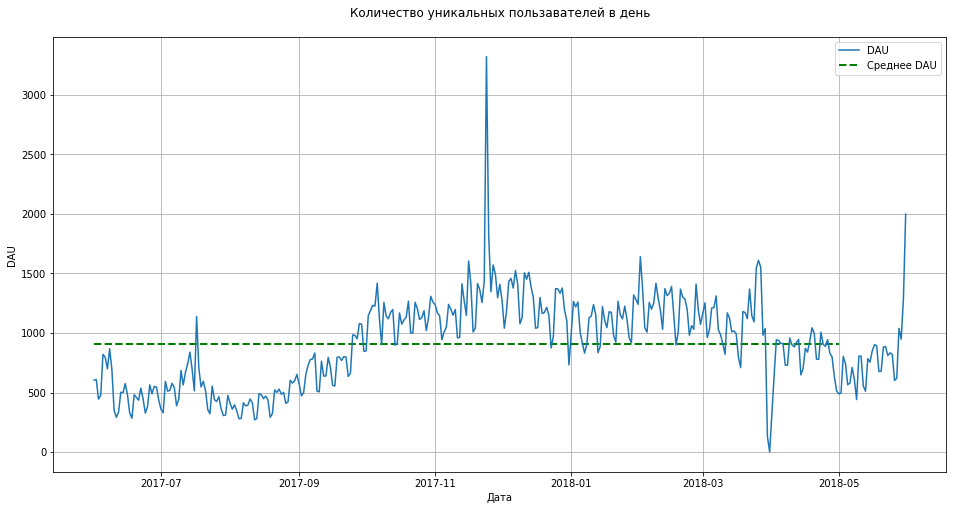

In [25]:
plt.figure(figsize=(16,8))
plt.plot(df_visits['session_date'].sort_values().unique(),  dau, label ='DAU')
plt.hlines(y=dau_mean,
           xmin = mau['session_month'].min(),
           xmax = mau['session_month'].max(),
           
            linewidth=2, 
            color='g', 
            linestyle='--',
            label = 'Среднее DAU')
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.title('Количество уникальных пользавателей в день', pad=20)
plt.grid(b=True)
plt.legend()
plt.show()

На графике хорошо видны недельные колебания количества пользователей и сезонные изменения аудитории. Выделяется предновогодний пик и странный спад до нуля в конце марта 2018 г., вызванный скорее всего техническими неисправностями сайта.

In [26]:

wau.head()

,session_week,uid
session_year,,
2017-01-01,2017-06-01,4082
2017-01-01,2017-06-08,3311
2017-01-01,2017-06-15,2844
2017-01-01,2017-06-22,3079
2017-01-01,2017-06-29,3055


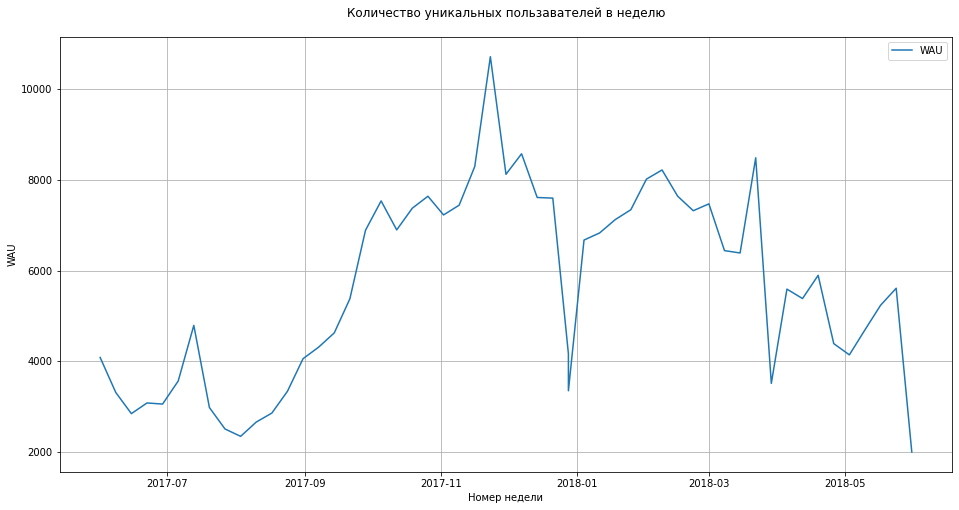

In [27]:
plt.figure(figsize=(16,8))
plt.plot(wau['session_week'], wau['uid'], label ='WAU')

plt.xlabel('Номер недели')
plt.ylabel('WAU')
plt.title('Количество уникальных пользавателей в неделю', pad=20)
plt.grid(b=True)
plt.legend()
plt.show()

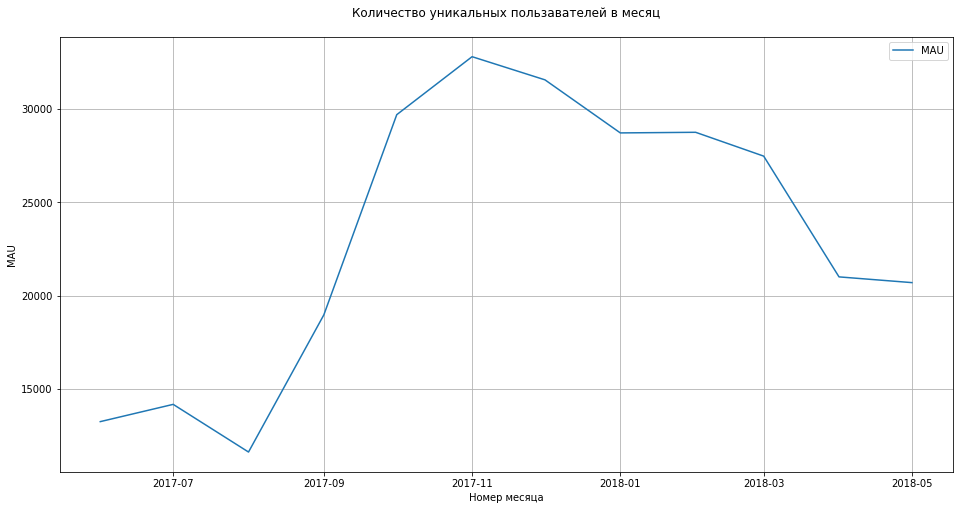

In [28]:
plt.figure(figsize=(16,8))
plt.plot(mau['session_month'], mau['uid'], label ='MAU')

plt.xlabel('Номер месяца')
plt.ylabel('MAU')
plt.title('Количество уникальных пользавателей в месяц', pad=20)
plt.grid(b=True)
plt.legend()
plt.show()

На графиках отчетливо виден рост пользовательской активности в 2017 году и последующий спад в 2018 году.

#### Рассчитаем сколько раз за день пользователи в среднем заходят на сайт

Построим график, отражающий изменения метрики во времени

In [29]:
visits_per_day = df_visits.groupby(['session_date'])['uid'].count()
print('В среднем пользователи заходят на сайт {:.0f} раз '.format(visits_per_day.mean()))


В среднем пользователи заходят на сайт 987 раз 


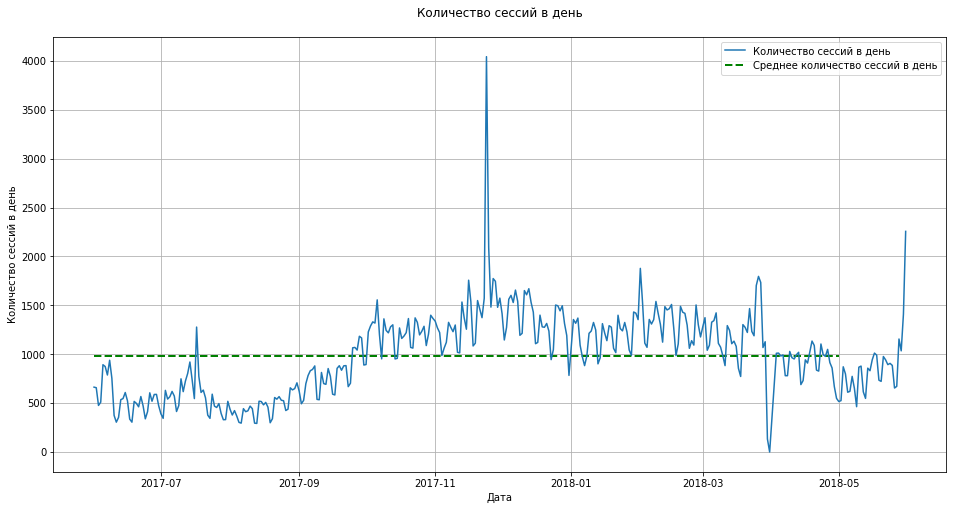

In [31]:
plt.figure(figsize=(16,8))
plt.plot( visits_per_day, label ='Количество сессий в день')
plt.hlines(y=visits_per_day.mean(),
           xmin = mau['session_month'].min(),
           xmax = mau['session_month'].max(),
           
            linewidth=2, 
            color='g', 
            linestyle='--',
            label = 'Среднее количество сессий в день')
plt.xlabel('Дата')
plt.ylabel('Количество сессий в день')
plt.title('Количество сессий в день', pad=20)
plt.grid(b=True)
plt.legend()
plt.show()

График количества сессий за день логично повторяет формой аналогичный график уникальных пользователей в день, с тем лишь отличием, что сессий в день больше, чем уникальных пользователей примерно на 10%. Это объясняется тем, что люди иногда заходят на сайт по несколько раз в день.

#### Изучим сколько времени пользователи проводят на сайте. 

Рассчитаем продолжительность типичной пользовательской сессии за весь период.

In [32]:
df_visits['session_duration_sec'] = (
    df_visits['end_ts'] - df_visits['start_ts']
).dt.seconds
print('Средняя продолжительность сессии за весь период = {:.0f}с.'. format(df_visits['session_duration_sec'].mean()))

Средняя продолжительность сессии за весь период = 644с.


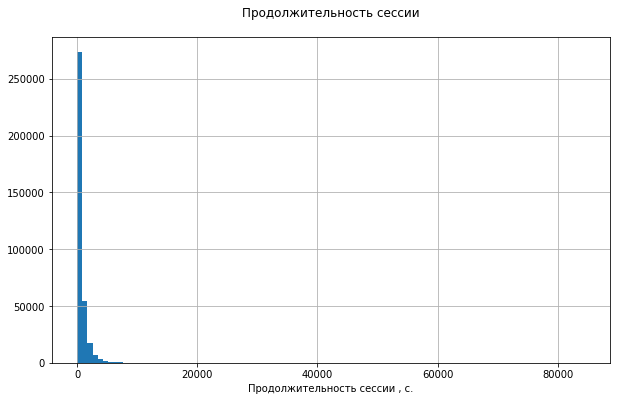

In [33]:
plt.figure(figsize=(10,6))
df_visits['session_duration_sec'].hist(bins=100) 

plt.xlabel('Продолжительность сессии , с.')

plt.title('Продолжительность сессии', pad=20)
plt.show()

Так как распределение продолжительности сессий далеко от нормального, используем моду как характерную меру.

In [34]:
print(df_visits['session_duration_sec'].mode()) 

0    60
dtype: int64


Наиболее часто встречающаяся продолжительность сессии равно 60 секундам.

#### Рассчитаем Retention Rate, применяя когортный анализ. 

In [35]:
# Определим день первого посещения сайта для каждого пользователя

first_visit_date = df_visits.groupby(['uid'])['session_date'].min()
first_visit_date.name = 'first_visit_date'
df_visits = df_visits.join(first_visit_date, on='uid') 

In [36]:
# Создадим когорты по месяцам первого посещения

df_visits['visit_month'] = df_visits['session_date'].astype('datetime64[M]')
df_visits['first_visit_month'] = df_visits['first_visit_date'].astype('datetime64[M]')



In [37]:
# Найдём lifetime когорты

df_visits['cohort_lifetime'] = df_visits['visit_month'] - df_visits['first_visit_month']
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'] / np.timedelta64(1, 'M')
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'].round()

In [38]:
cohorts = df_visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
cohorts.columns = ['first_visit_month', 'cohort_lifetime','users']
cohorts

,first_visit_month,cohort_lifetime,users
0,2017-06-01,0.0,13259
1,2017-06-01,1.0,1043
2,2017-06-01,2.0,713
3,2017-06-01,3.0,814
4,2017-06-01,4.0,909
...,...,...,...
73,2018-03-01,1.0,861
74,2018-03-01,2.0,557
75,2018-04-01,0.0,15709
76,2018-04-01,1.0,760


In [39]:
# Получим число пользователей, изначально бывших в когорте

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'users']]
initial_users_count = initial_users_count.rename(columns={'users':'cohort_users'})

In [40]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month') 

In [41]:
# Рассчитаем Retention Rate. Разделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте

cohorts['retention'] = cohorts['users']/cohorts['cohort_users'] 
cohorts

,first_visit_month,cohort_lifetime,users,cohort_users,retention
0,2017-06-01,0.0,13259,13259,1.000000
1,2017-06-01,1.0,1043,13259,0.078664
2,2017-06-01,2.0,713,13259,0.053775
3,2017-06-01,3.0,814,13259,0.061392
4,2017-06-01,4.0,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1.0,861,20589,0.041818
74,2018-03-01,2.0,557,20589,0.027053
75,2018-04-01,0.0,15709,15709,1.000000
76,2018-04-01,1.0,760,15709,0.048380


In [42]:
retention_pivot = cohorts.pivot_table(
    index='first_visit_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 


In [43]:
# Изменим формат столбца 'first_visit_month' для лучшего отображения heatmap диаграммы.

retention_pivot = retention_pivot.reset_index()
retention_pivot['first_visit_month'] = retention_pivot['first_visit_month'].dt.strftime('%Y-%m-%d') 
retention_pivot['first_visit_month'] = retention_pivot['first_visit_month'].tolist() 
retention_pivot=retention_pivot.set_index('first_visit_month')

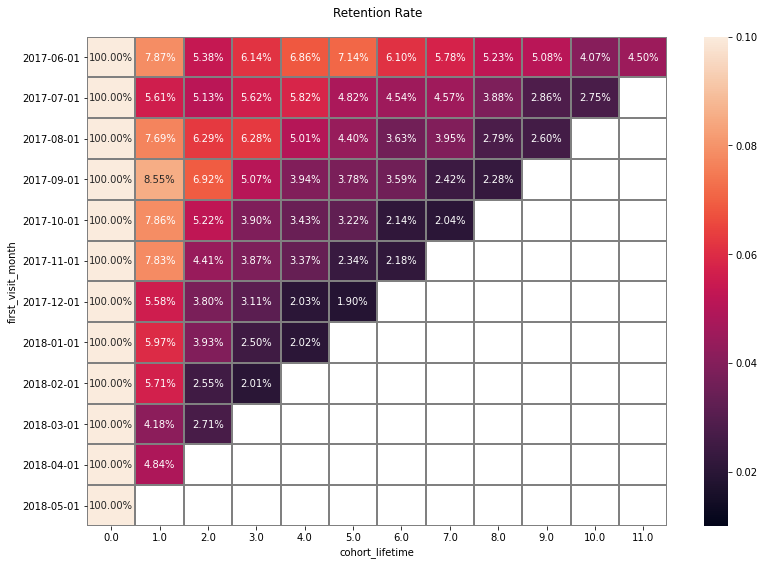

In [45]:
# Построим heatmap для иллюстрации изменения Retantion rate в когортах со времением.

plt.figure(figsize=(13, 9))
plt.title('Retention Rate', pad = 20)
sns.heatmap(retention_pivot, vmin=0.01, vmax=0.1, annot=True, fmt='.2%', linewidths=1, linecolor='gray'); 

После первого месяца количество покупателей в когорте резко снижается.
Retention Rate в первый месяц убывает по когортам с сентября 2017г больше чем в два раза (с 8,55% в сентябре 2017г до 4,18% в марте 2018г). Это говорит, что с каждой новой когортой поведение покупателей меняется. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки.
Когорта июня 2017 года сохраняет относительно большой Retention Rate до конца периода исследования.

Найдем средний Retention Rate на второй месяц «жизни» когорт.

In [46]:
snd_month_retention = cohorts[cohorts['cohort_lifetime']==2]['retention'].mean()
    
print('Cредний Retention Rate на второй месяц «жизни» когорт = {:.2%}:'.format(snd_month_retention))

Cредний Retention Rate на второй месяц «жизни» когорт = 4.63%:


#### Вывод

На построенных графиках количества уникальных пользавателей в день виден рост пользовательской активности в 2017 году и последующий спад в 2018 году.
Самая распространенная продолжительность сессии равна 1 минуте. Также встречаются оченьдолгие сессии более 20 часов, поэтому среднее значение продолжительности сессии за весь период (644с) не отражает характер распределения длительности сессий.
В среднем сайт ежедневно посещает 907 уникальных пользователей. В неделю этот параметр равен 5621, что значительно меньше семикратного DAU. Sticky factor за неделю равен 16%. Среднее значение MAU = 23228, а Sticky factor за месяц меньше 4%.
Когортный анализ Retention rate также показывает возможные проблемы с удержанием аудитории. Количество покупателей в когорте резко снижается после первого месяца в каждой когорте (на второй месяц «жизни» когорт в среднем Retention Rate равен 4.63%) и также по когортам в течении всего периода наблюдений. Это говорит, что с каждой новой когортой поведение покупателей меняется. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки. Когорта июня 2017 года сохраняет относительно большой Retention Rate до конца периода исследования.

### Рассчет метрик электронной коммерции

#### Время в среднем с момента первого посещения сайта до совершения покупки

In [47]:
# Составим таблицу с визитами и продажами

visit_to_order = raw_visits.merge(raw_orders, left_on = 'Uid', right_on = 'Uid', how = 'left')
visit_to_order.head()


,Device,End Ts,Source Id,Start Ts,Uid,Buy Ts,Revenue
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,NaN,NaN
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,NaN,NaN
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,NaN,NaN
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:25:00,2.33
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,NaN,NaN


In [48]:
# Найдем сколько времени проходит с момента первого посещения сайта до совершения покупки


visit_to_order['Buy Ts'] = pd.to_datetime(visit_to_order['Buy Ts'])
visit_to_order['Start Ts'] = pd.to_datetime(visit_to_order['Start Ts'])

first_visit_date = visit_to_order.groupby(['Uid'])['Start Ts'].min()
first_visit_date.name = 'first_visit_date'
visit_to_order = visit_to_order.join(first_visit_date, on='Uid') 

first_order_date = visit_to_order.groupby(['Uid'])['Buy Ts'].min()
first_order_date.name = 'first_order_date'
visit_to_order = visit_to_order.join(first_order_date, on='Uid') 

visit_to_order['time_to_first_order'] = visit_to_order['first_order_date'] - visit_to_order['first_visit_date']
visit_to_order['time_to_first_order'] = visit_to_order['time_to_first_order'] / np.timedelta64(1, 'D')
print('С момента первого посещения сайта до первой покупки в среднем проходит {:.2f} дней'.format(visit_to_order['time_to_first_order'].mean()))

С момента первого посещения сайта до первой покупки в среднем проходит 17.65 дней


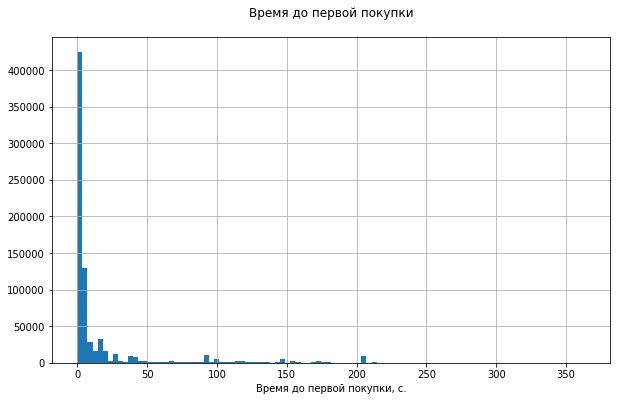

In [49]:
plt.figure(figsize=(10,6))
visit_to_order['time_to_first_order'].hist(bins=100) 

plt.xlabel('Время до первой покупки, с.')

plt.title('Время до первой покупки', pad=20)
plt.show()

In [50]:
visit_to_order['time_to_first_order'].median()

1.992361111111111

In [51]:
#

print('Медианное значение периода с момента первого посещения сайта до первой покупки - {:.2f} дней'.format(visit_to_order['time_to_first_order'].median()))

Медианное значение периода с момента первого посещения сайта до первой покупки - 1.99 дней


#### Среднее количество покупок на одного покупателя за 6 месяцев

In [52]:
df_orders['order_year']  = df_orders['buy_ts'].astype('datetime64[Y]')
df_orders['order_month'] = df_orders['buy_ts'].astype('datetime64[M]')
df_orders['order_week']  = df_orders['buy_ts'].astype('datetime64[W]')
df_orders['order_date'] = df_orders['buy_ts'].dt.date
df_orders.head()

,buy_ts,revenue,uid,order_year,order_month,order_week,order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-01-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-01-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-01-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-01-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-01-01,2017-06-01,2017-06-01,2017-06-01


In [53]:
df_orders['order_month']

0       2017-06-01
1       2017-06-01
2       2017-06-01
3       2017-06-01
4       2017-06-01
           ...    
50410   2018-05-01
50411   2018-05-01
50412   2018-05-01
50413   2018-05-01
50414   2018-06-01
Name: order_month, Length: 50415, dtype: datetime64[ns]

In [54]:
six_month1_orders = df_orders[df_orders['order_month'] < "2017-12-01"]
six_month2_orders = df_orders[df_orders['order_week'] >= "2017-12-01"]
six_month1_orders.head()

,buy_ts,revenue,uid,order_year,order_month,order_week,order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-01-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-01-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-01-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-01-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-01-01,2017-06-01,2017-06-01,2017-06-01


In [55]:
avg_six_month1_orders = six_month1_orders['uid'].value_counts().mean()
avg_six_month2_orders = six_month2_orders['uid'].value_counts().mean()
print('В среднем за первое полугодие покупатель совершил {:.2f} покупок'.format(avg_six_month1_orders))
print('В среднем за второе полугодие покупатель совершил {:.2f} покупок'.format(avg_six_month2_orders))

В среднем за первое полугодие покупатель совершил 1.30 покупок
В среднем за второе полугодие покупатель совершил 1.33 покупок


Количество покупок во втором полугодии выросло

#### Рассчет значения среднего чека по времени

In [56]:
orders_count = df_orders.groupby(['order_week']).agg({'revenue': 'count'})
revenue_sum = df_orders.groupby(['order_week']).agg({'revenue': 'sum'})
avg_rev = revenue_sum / orders_count  
avg_rev.reset_index(inplace = True)
avg_rev.head()

,order_week,revenue
0,2017-06-01,2.842254
1,2017-06-08,4.831448
2,2017-06-15,4.478973
3,2017-06-22,4.760136
4,2017-06-29,5.314143


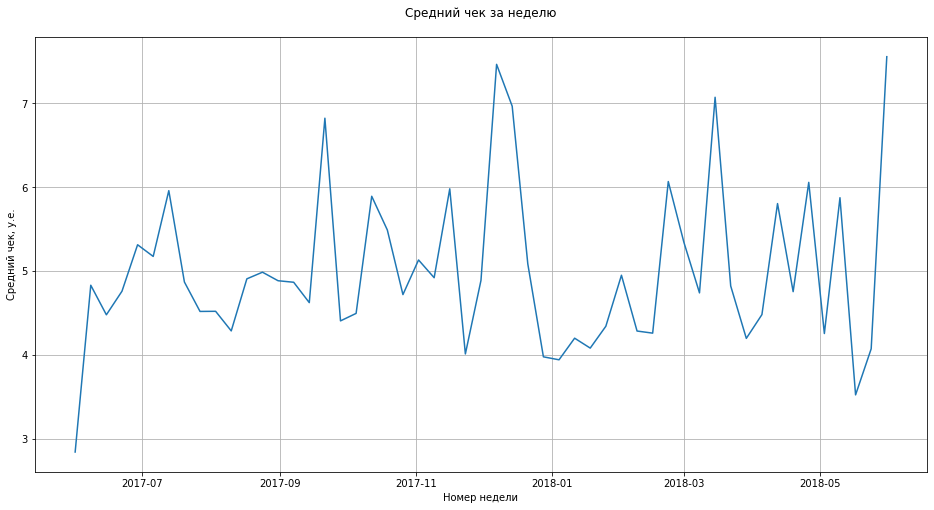

In [57]:
plt.figure(figsize=(16,8))
plt.plot(avg_rev['order_week'],  avg_rev['revenue'])

plt.xlabel('Номер недели')
plt.ylabel('Средний чек, у.е.')
plt.title('Средний чек за неделю', pad=20)
plt.grid(b=True)

plt.show()

На графике видны значительные колебания среднего чека в диапазоне от 3 у.е. до 8 у.е. В целом, достаточно трудно выявить тренд изменения размера среднего чека с течением времени.

#### Изучим как меняется LTV на покупателя по когортам

In [58]:
# Составим когорты по дате первой покупки

df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])

df_orders['order_month'] = df_orders['order_date'].astype('datetime64[M]')



first_orders = df_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [59]:
orders_first_month = pd.merge(df_orders, first_orders, on='uid')
cohorts = (
    orders_first_month.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.490234
1,2017-06-01,2023,2017-07-01,981.820007
2,2017-06-01,2023,2017-08-01,885.340027
3,2017-06-01,2023,2017-09-01,1931.300049
4,2017-06-01,2023,2017-10-01,2068.580078


In [60]:
# Рассчитаем валовую прибыль и LTV 

margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = (report['gp'] / report['n_buyers']).round(3)


In [61]:
# Построим сводную таблицу с LTV

final_result = report.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='mean') 
final_result= final_result.cumsum(axis=1)
final_result

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724,5.209,5.647,6.602,7.625,8.361,9.311,9.893,10.446,11.052,11.623,11.88
2017-07-01,6.010,6.345,6.969,7.328,7.505,7.661,7.781,7.923,8.084,8.231,8.387,NaN
2017-08-01,5.277,5.749,6.207,6.598,7.092,7.376,7.587,7.992,8.284,8.472,NaN,NaN
2017-09-01,5.645,6.763,7.284,11.260,11.661,12.308,13.010,13.253,13.437,NaN,NaN,NaN
2017-10-01,5.004,5.540,5.731,5.888,6.040,6.160,6.245,6.360,NaN,NaN,NaN,NaN
2017-11-01,5.155,5.554,5.754,6.079,6.227,6.281,6.396,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738,4.998,5.923,6.988,7.301,7.639,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.136,4.431,4.735,4.878,4.941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.157,4.435,4.514,4.588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Рассчитаем накопительный LTV за 6 месяцев после первой покупки

m6_cum_ltv = final_result[5].mean(axis=0)

print('Средний LTV за 6 месяцев после первой покупки: {:.2f} у.е.'.format(m6_cum_ltv))

Средний LTV за 6 месяцев после первой покупки: 7.97 у.е.


Изучим как изменяется среднемесячный LTV

In [63]:
month_ltv = final_result.reset_index()
month_ltv = month_ltv.mean(axis=0)
month_ltv

age
0      4.801846
1      5.395818
2      5.822000
3      6.689889
4      7.299000
5      7.969429
6      8.388333
7      9.084200
8     10.062750
9      9.251667
10    10.005000
11    11.880000
dtype: float64

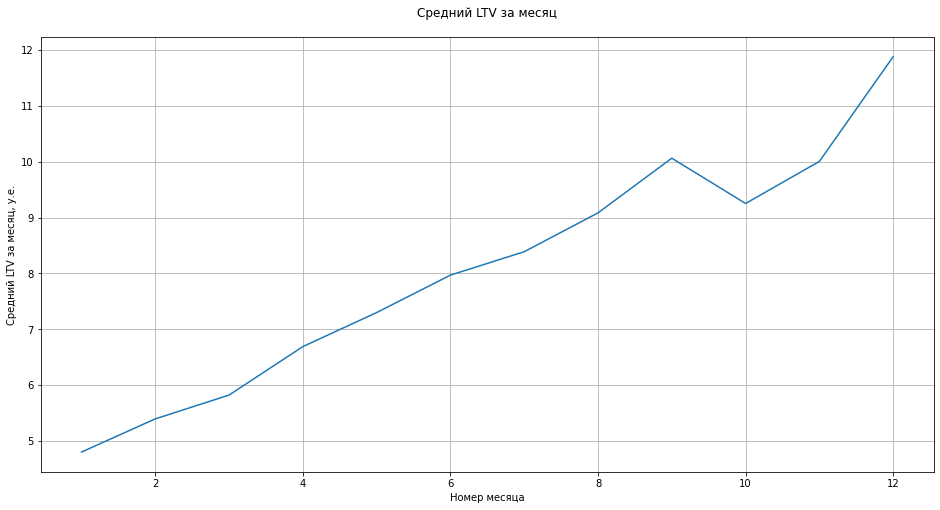

In [64]:
plt.figure(figsize=(16,8))
plt.plot(month_ltv.index+1, month_ltv)

plt.xlabel('Номер месяца')
plt.ylabel('Средний LTV за месяц, у.е.')
plt.title('Средний LTV за месяц', pad=20)
plt.grid(b=True)

plt.show()

На графике хорошо виден рост среднего LTV со временем в течении всего срока наблюдений за исключением 10го месяца.

#### Вывод

Несмотря на то, что в среднем пользователи стали совершать больше покупок во втором полугодии исследуемого периода, чем в первом (1,33 против 1,3), однако выявить тренд изменения размера среднего чека с течением времени достаточно трудно. В целом из графика LTV можно сделать вывод о уверенном расте покупательской ценности. Средний LTV за 6 месяцев после первой покупки равен 7.97 у.е.
По результатам когортного анализа LTV можно выделить две наиболее ценные когорты: июня и сентября 2017г.

### Рассчет маркетинговых метрик

#### Рассчет общей суммы расходов на маркетинг

In [65]:
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.199997
1,1,2017-06-02,62.250000
2,1,2017-06-03,36.529999
3,1,2017-06-04,55.000000
4,1,2017-06-05,57.080002


In [66]:
all_costs = df_costs['costs'].sum()
print('Всего на рекламу потрачено {:.0f} у.е'.format(all_costs))

Всего на рекламу потрачено 329132 у.е


In [67]:
# Посмотрим как эта сумма распределена по рекламным источникам 

sources_costs = df_costs.groupby('source_id').sum().astype(int)
sources_costs

,costs
source_id,
1,20833
2,42806
3,141321
4,61073
5,51757
9,5517
10,5822


Значительно больше других выделяется бюджет на канал №3. Каналы с 6 по 8 бесплатные или не представлены в наших данных.

In [68]:
df_costs['month'] = df_costs['dt'].astype('datetime64[M]') 
sources_group = df_costs.groupby(['month','source_id'])['costs'].sum()
sources_group = sources_group.reset_index(1)
sources_group.head()


,source_id,costs
month,,
2017-06-01,1,1125.609985
2017-06-01,2,2427.379883
2017-06-01,3,7731.649902
2017-06-01,4,3514.800049
2017-06-01,5,2616.120117


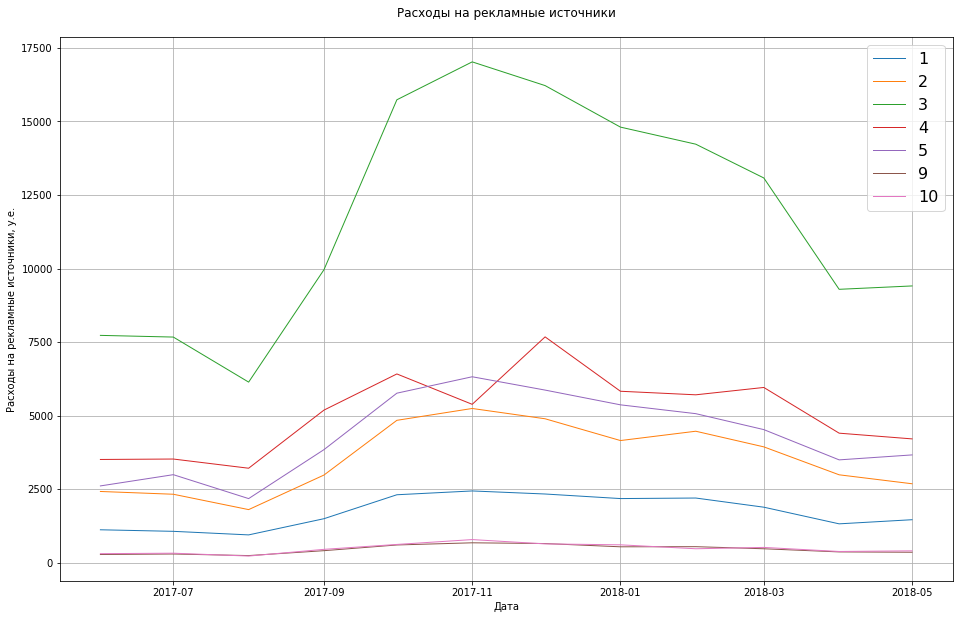

In [69]:
plt.figure(figsize=(16,10))
for i in sources_group['source_id'].unique():
    data = sources_group[sources_group['source_id'] ==  i]
    plt.plot(data.index, data['costs'], label = i, linewidth = 1)

    plt.xlabel('Дата')
    plt.ylabel('Расходы на рекламные источники, у.е.')
    plt.title('Расходы на рекламные источники', pad=20)
    plt.grid(b=True)
    plt.legend(prop = {'size': 16})
plt.show()

Из семи источников больше всего было вложено в №3. Все источники получали увеличенные бюджеты перед новым годом.

#### Рассчитаем средний CAC на одного покупателя

In [70]:
first_visits = df_visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start_ts']
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')
first_visits.head()

,uid,first_session_start_ts,first_session_dt,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01


In [71]:
df_orders['buy_dt'] = df_orders['buy_ts'].dt.date
first_orders = df_orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')
first_orders.head()

,uid,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [72]:
buyers = pd.merge(first_visits, first_orders, on = 'uid')
buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [73]:
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])
buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_session_start_ts'])/ np.timedelta64(1, 'D')).astype('int')
buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0


In [74]:
cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.rename(columns = {'uid': 'n_buyers'}, inplace = True)
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [75]:
cohorts = pd.merge(df_orders, buyers, how = 'inner', on = 'uid').groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.490234
1,2017-06-01,2017-07-01,981.820007
2,2017-06-01,2017-08-01,885.340027
3,2017-06-01,2017-09-01,1931.300049
4,2017-06-01,2017-10-01,2068.580078


In [76]:
cohorts['age_month'] = ((cohorts['order_month'] -  cohorts['first_order_month']) / np.timedelta64(1, 'M')).round()
cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']

In [77]:
cohorts_report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']
cohorts_report.head()

,first_order_month,n_buyers,order_month,revenue,age_month,rev_per_buyer
0,2017-06-01,2023,2017-06-01,9557.490234,0.0,4.724414
1,2017-06-01,2023,2017-07-01,981.820007,1.0,0.485329
2,2017-06-01,2023,2017-08-01,885.340027,2.0,0.437637
3,2017-06-01,2023,2017-09-01,1931.300049,3.0,0.954671
4,2017-06-01,2023,2017-10-01,2068.580078,4.0,1.022531


In [78]:
cohorts_age = cohorts_report.pivot_table(index = 'first_order_month',
                                        columns = 'age_month',
                                        values = 'rev_per_buyer',
                                        aggfunc = 'sum').cumsum(axis = 1)
cohorts_age.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


In [79]:
users = df_visits.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]
buyers = pd.merge(buyers, users, left_on = 'uid', right_index = True)
buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,106,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,0,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0,5


In [80]:
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid':'count'}).reset_index()
buyers_daily.rename(columns = {'uid': 'n_buyers'},inplace = True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])
buyers_daily.head()

,source_id,first_order_dt,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [81]:
df_costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.199997,2017-06-01
1,1,2017-06-02,62.250000,2017-06-01
2,1,2017-06-03,36.529999,2017-06-01
3,1,2017-06-04,55.000000,2017-06-01
4,1,2017-06-05,57.080002,2017-06-01


In [82]:
costs_ = pd.merge(buyers_daily, df_costs, left_on = ['source_id', 'first_order_dt'], right_on = ['source_id', 'dt'])
costs_['cost_per_buyer'] = costs_['costs'] / costs_['n_buyers']

costs_.head()

,source_id,first_order_dt,n_buyers,dt,costs,month,cost_per_buyer
0,1,2017-06-01,14,2017-06-01,75.199997,2017-06-01,5.371428
1,1,2017-06-02,7,2017-06-02,62.250000,2017-06-01,8.892857
2,1,2017-06-03,7,2017-06-03,36.529999,2017-06-01,5.218571
3,1,2017-06-04,3,2017-06-04,55.000000,2017-06-01,18.333333
4,1,2017-06-05,18,2017-06-05,57.080002,2017-06-01,3.171111


In [83]:
print('Средняя стоимость привлечения ондого клиента по разным источникам ')
costs_.groupby('source_id')['cost_per_buyer'].mean()

Средняя стоимость привлечения ондого клиента по разным источникам 


source_id
1      9.489732
2     16.287024
3     15.580474
4      7.271743
5      8.336731
9      6.842532
10     6.555415
Name: cost_per_buyer, dtype: float64

In [84]:

costs_group = costs_.pivot_table(index = ['month'], columns = 'source_id', values = 'cost_per_buyer', aggfunc = 'mean')
costs_group

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,11.681283,12.883568,16.716919,10.792094,9.209676,5.253654,4.590158
2017-07-01,9.491485,18.000253,18.593952,8.054483,7.938157,5.582433,6.151880
2017-08-01,12.118898,18.886449,19.795068,11.554926,6.879620,4.900254,5.813398
2017-09-01,8.155731,17.672249,13.084043,9.533800,6.864844,6.049126,8.306581
2017-10-01,8.202083,14.193003,14.613088,6.233562,6.305969,5.923235,6.362921
2017-11-01,8.908503,17.437690,16.091445,5.013132,9.368019,9.400503,10.801337
2017-12-01,8.570439,13.871086,12.948321,5.656507,8.399174,7.899420,7.803197
2018-01-01,11.719181,15.850151,15.134989,5.901092,9.371755,9.792713,9.851557
2018-02-01,10.752216,18.209325,13.894612,5.428068,7.725369,8.181382,4.489624


<Figure size 1152x720 with 0 Axes>

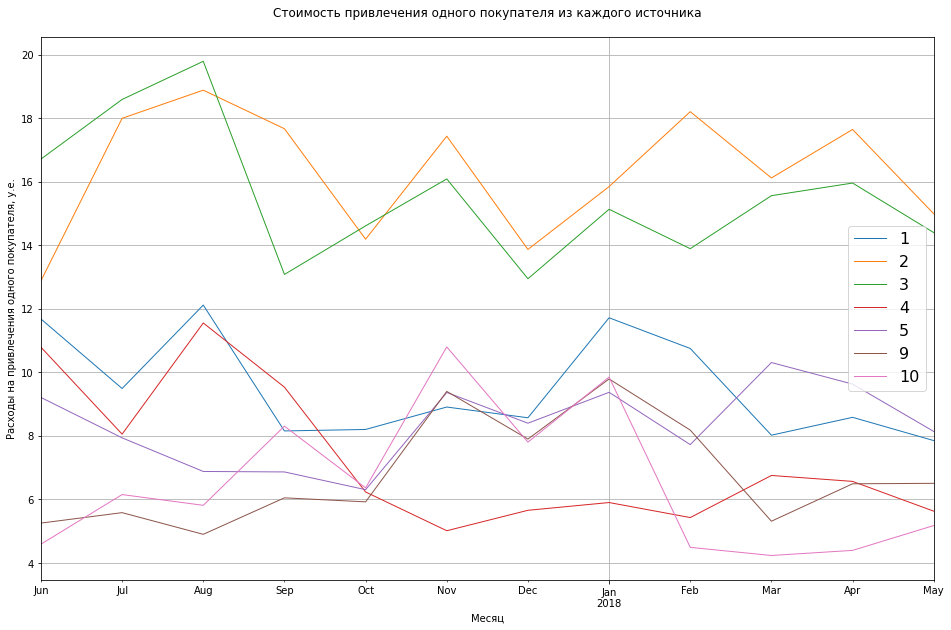

In [85]:
plt.figure(figsize=(16,10))
costs_group.plot(figsize=(16,10), linewidth = 1)
plt.xlabel('Месяц')
plt.ylabel('Расходы на привлечения одного покупателя, у.е.')
plt.title('Стоимость привлечения одного покупателя из каждого источника', pad=20)
plt.grid(b=True)
plt.legend(prop = {'size': 16}, loc= 'center right')
plt.show()

На графике хорошо видно, что каналы 2 и 3 получаются дороже в расчете на одного пользователя. Самой низкой стоимостью привлечения пользователя характеризуются каналы 4, 9 и 10. При этом с четвертого рекламного источника пришло на порядок больше клиентов, чем с 9 и 10.

#### Рассчитаем ROMI по когортам в разрезе источников

In [96]:
#Используем таблицу buyers

buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,106,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,0,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0,5


In [97]:
# Найдем канал с которого покупатели впервые приходили на сайт

first_source = buyers[['uid','source_id']]
first_source.columns = ['uid', 'first_source_id']
first_source.head()

,uid,first_source_id
0,313578113262317,2
1,1575281904278712,10
2,2429014661409475,3
3,2464366381792757,5
4,2551852515556206,5


In [98]:
# Составим когорты по первому каналу привлечения на сайт

cohort_sizes = (
    first_source.groupby('first_source_id')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_source_id', 'n_buyers']
cohort_sizes.head()

,first_source_id,n_buyers
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931


In [99]:
# Получим информацию о выручке по мецяцу для каждого канала трафика

orders_first_source = pd.merge(df_orders, first_source, on='uid')

orders_first_source.head()

,buy_ts,revenue,uid,order_year,order_month,order_week,order_date,buy_dt,first_source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,3


In [100]:
cohorts = (
    orders_first_source.groupby(['first_source_id', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts.head()

,first_source_id,order_month,revenue
0,1,2017-06-01,1378.699951
1,1,2017-07-01,1581.680054
2,1,2017-08-01,1441.489990
3,1,2017-09-01,3071.610107
4,1,2017-10-01,3621.820068


In [101]:
# Рассчитаем LTV для каждой когорты. При маржинальности 100% валовая прибыль равна выручке

report = pd.merge(cohort_sizes, cohorts, on='first_source_id')

report['gp'] = report['revenue']
start_date = pd.to_datetime('2017-06-01', format='%Y-%m-%d')

report['ltv'] = report['gp'] / report['n_buyers']

# Добавим информацию о маркетинговых затратах

monthly_costs = df_costs.groupby('month')['costs'].sum()

report_new = pd.merge(
    report, monthly_costs, left_on='order_month', right_on='month', how = 'left'
)
report_new.head()


,first_source_id,n_buyers,order_month,revenue,gp,ltv,costs
0,1,2899,2017-06-01,1378.699951,1378.699951,0.475578,18015.000000
1,1,2899,2017-07-01,1581.680054,1581.680054,0.545595,18240.589844
2,1,2899,2017-08-01,1441.489990,1441.489990,0.497237,14790.540039
3,1,2899,2017-09-01,3071.610107,3071.610107,1.059541,24368.910156
4,1,2899,2017-10-01,3621.820068,3621.820068,1.249334,36322.878906


In [102]:
# Рассчитаем CAC и ROMI

report_new['cac'] = report_new['costs'] / report_new['n_buyers']



In [103]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
    index='first_source_id', columns='order_month', values='romi', aggfunc='mean'
)
romi_source = output.cumsum(axis=1).round(2).dropna()

romi_source.head()

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_source_id,,,,,,,,,,,,
1,0.08,0.16,0.26,0.39,0.49,0.58,0.65,0.73,0.80,0.93,1.04,1.15
2,0.06,0.16,0.22,0.32,0.47,0.59,0.71,0.80,1.00,1.26,1.42,1.65
3,0.16,0.33,0.46,0.66,0.82,0.99,1.15,1.29,1.45,1.62,1.77,1.99
4,0.11,0.27,0.39,0.52,0.68,0.87,1.07,1.20,1.38,1.60,1.81,2.02
5,0.11,0.25,0.39,0.57,0.73,0.83,1.21,1.32,1.48,1.60,1.71,1.82


In [104]:
# Изменим формат отображения дат на heatmap

romi_source = romi_source.reset_index()
romi_source_t = romi_source.T
romi_source_t = romi_source_t.reset_index()
romi_source_t['order_month'][1:14] = pd.to_datetime(romi_source_t['order_month'][1:14],errors = 'coerce',format = '%Y-%m-%d').dt.strftime('%Y-%m-%d') 
romi_source.columns = romi_source.columns.tolist() 
romi_source_t=romi_source_t.set_index('order_month')
romi_source_t
romi_source = romi_source_t.T
romi_source = romi_source.set_index('first_source_id')


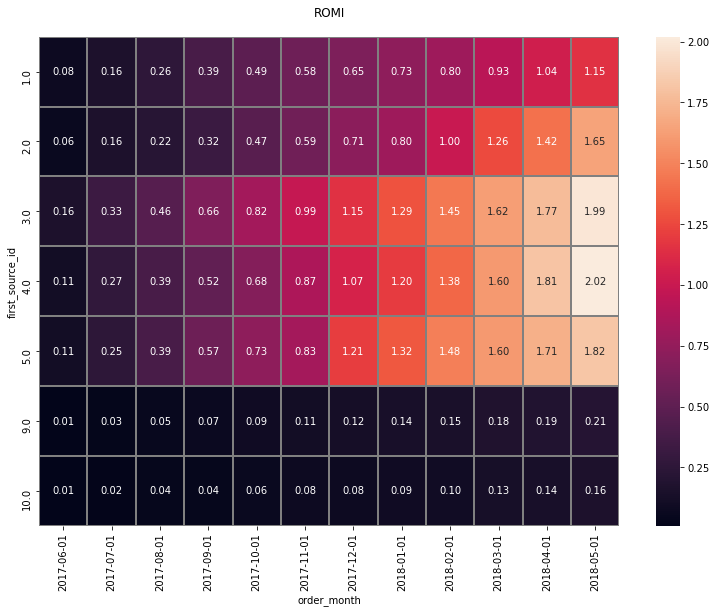

In [105]:
# Построим heatmap для иллюстрации изменения ROMI в когортах со времением.

plt.figure(figsize=(13, 9))
plt.title('ROMI', pad = 20)
sns.heatmap(romi_source, annot = True, fmt='.2f', linewidths=1, linecolor='gray'); 


На диаграммах хорошо видно, что первые 5 рекламных каналов имеют значительно большее ROMI по сравнению с остальными каналами. 
Канал №2 лучший по среднему ROMI за 6 месяцев после первой покупки.

### Выводы

#### Перспективные источники трафика

По результатам исследования маркетинговых метрик видно, что самый большой рекламный бюджет приходится на источник №3. В пике расходы на этот источник составляли около 17000 у.е. в месяц, в то время, как на другие рекламные каналы не приходилось более 8000 у.е. в месяц на канал. При этом стоимость приобретения клиента CAC через канал №3 также самая большая. Каналы, в которые вкладываются значительно меньшие деньги (каналы №1, №2, №4 и №5) имеют значительно более низкий CAC. Также стоит отметить, что канал трафика №4 приводит наибольшее число клиентов, делающий первый заказ на сайте. График возврата рекламных инвестиций показывает, что быстрее всего отбиваются деньги, вложенные в каналы №2 ,№4 и №3, а каналы №9 и №10 далеки от окупаемости даже после года наблюдений. Все это говорит о том, что рекламный бюджет, выделяемый на канал №3 неоправданно большой. Его стоит перераспределеить в пользу других каналов (№1, №2, №4 и №5). Рекламные каналы №9 и №10 не приносят достаточное количество клиентов для окупаемости. Их не стоит использовать.

#### Общие выводы

В результате исследования получены значения основных продуктовых метрик:

Среднее значение DAU = 907
Среднее значение WAU = 5716
Среднее значение MAU = 23228

Получены данные о значительном росте пользовательской активности в 2017 году с последующим спадом в 2018 году. При этом типичной пользовательской сессией является 60 секундный сеанс.

Количество покупок, которые в среднем совершил каждый пользователь увеличилось за время исследования. В среднем за первое полугодие покупатель совершил 1.3 покупок, а за второе полугодие - 1.33 покупок. Медианное значение периода с момента первого посещения сайта до первой покупки - 1.99 дней.

На графике среднего LTV по времени хорошо виден рост этого показателя в течении всего срока наблюдений за исключением 10го месяца со средним LTV за 6 месяцев после первой покупки: 7.97 у.е. 


Наибольший CAC имеет канал №3. Наиболее эффективно привлекает клиентов каналы № 4, 9, 10. Из. таблицы количества клиентов по каналам привлечения видно, что каналы 9 и 10 приводят небольшое число новых пользователей, а канал №4 - лидирует в этом отношении. Рекламный бюджет, выделяемый на канал №3 стоит перераспределеить в пользу других каналов (№1, №2, №4 и №5), а рекламные каналы №9 и №10 не приносят достаточное количество клиентов для окупаемости и их не стоит использовать.

#### Результаты когортного анализа

Проведен когортный анализ поведенияпользователей сайта Яндекс.Афиши по дате первого посещения ресура и по каналу привлечения клиентов.
В результате выявлены наиболее важные когорты клиентов.
Составлены поведенческие когорты по факту первого посещения сайта. После первого месяца количество покупателей в каждой когорте резко снижается, а Retention Rate в первый месяц также убывает по когортам с сентября 2017г больше чем в два раза (с 8,55% в сентябре 2017г до 4,18% в марте 2018г). Это говорит, что с каждой новой когортой поведение покупателей меняется. При этом средний Retention Rate на второй месяц «жизни» когорт равен 4.6%.

Наиболее экономически перспективными когортами по иточнику трафика явсяются клиенты, пришедшие на сайт с каналов №2, №3 и №4.
